In [29]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate 
import glob

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [30]:
NABIS = pd.read_csv("./진짜 진짜 진짜로 전처리 완료된 대회 분석 데이터.csv")
NABIS = pd.DataFrame(NABIS)
NABIS

,Unnamed: 0,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,...,전북특별자치도_소아과 병원 수_표준화,전북특별자치도_소아과 의료인력 수_표준화,전라남도_소아과 병원 수_표준화,전라남도_소아과 의료인력 수_표준화,경상북도_소아과 병원 수_표준화,경상북도_소아과 의료인력 수_표준화,경상남도_소아과 병원 수_표준화,경상남도_소아과 의료인력 수_표준화,제주특별자치도_소아과 병원 수_표준화,제주특별자치도_소아과 의료인력 수_표준화
0,0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
1,1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
2,2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
3,3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
4,4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1788,1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1789,1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1790,1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767


In [31]:
NABIS["강원특별자치도_건강보험"]

0       1491120
1       1491120
2       1491120
3       1491120
4       1491120
         ...   
1787    1503671
1788    1503671
1789    1503671
1790    1503671
1791    1503671
Name: 강원특별자치도_건강보험, Length: 1792, dtype: int64

In [32]:
from sklearn.cluster import KMeans

features = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', '지역 소아과 수', 
    '강원특별자치도_건강보험', '강원특별자치도_천명당 소아과 수']]

# n_clusters: 군집 개수를 설정 
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

NABIS['K-MEAN 군집'] = kmeans.fit_predict(features)

KGoonjib = './K-MEAN 강원도 군집화 결과2.xlsx'
NABIS.to_excel(KGoonjib, index=False)

NABIS['K-MEAN 군집'].value_counts()

K-MEAN 군집
7     168
6     168
1     168
3     168
30     56
23     56
5      56
19     56
39     28
37     28
17     28
24     28
22     28
13     28
11     28
38     28
36     28
16     28
15     28
18     28
28     28
33     28
2      28
9      28
32     28
35     28
21     28
10     28
26     28
29     28
0      28
8      28
12     28
4      28
20     28
14     28
31     28
27     28
34     28
25     28
Name: count, dtype: int64

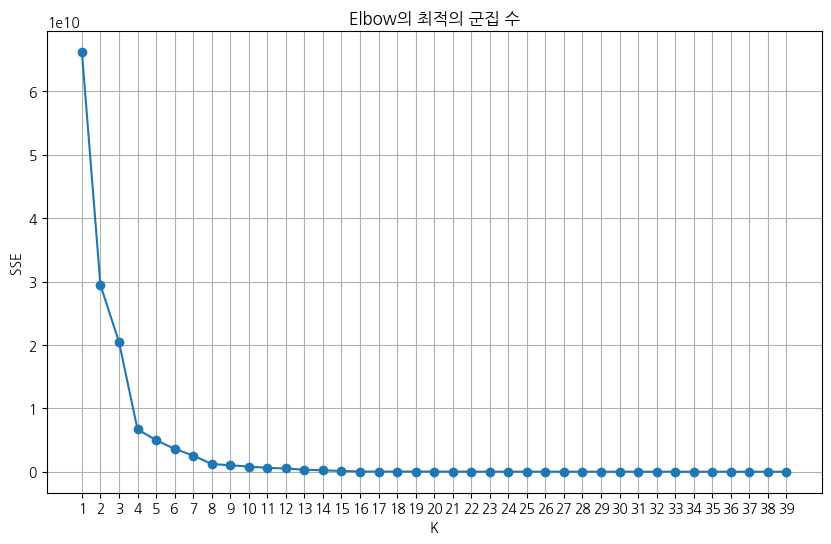

In [33]:
# Elbow 방법으로 SSE(군집내 제곱합)을 계산하여 최적의 군집 수 찾기
sse = []  
k_range = range(1, 40)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()

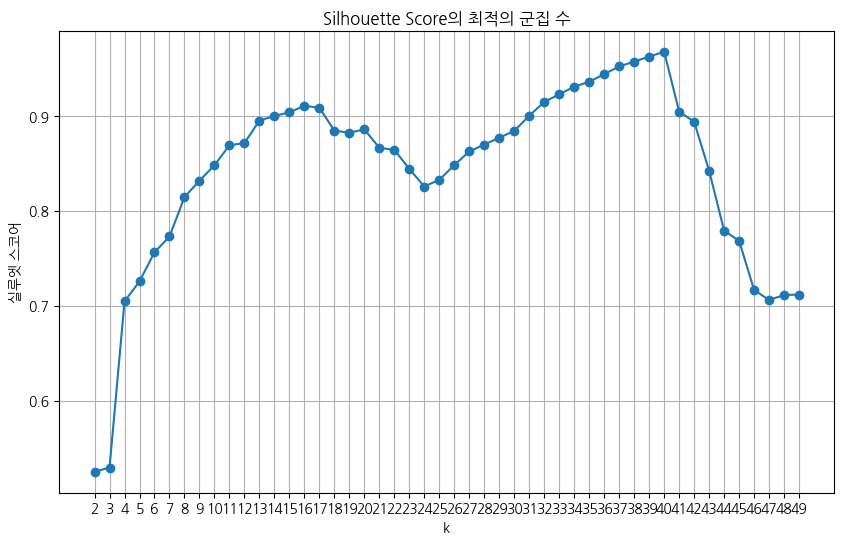

In [34]:
from sklearn.metrics import silhouette_score

# 실루엣 계수로 최적의 군집 수 찾기
silhouette_scores = []
k_range = range(2, 50)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('실루엣 스코어')
plt.title('Silhouette Score의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()


군집별 데이터 수:
 K-MEAN 군집
7     168
6     168
1     168
3     168
30     56
23     56
5      56
19     56
39     28
37     28
17     28
24     28
22     28
13     28
11     28
38     28
36     28
16     28
15     28
18     28
28     28
33     28
2      28
9      28
32     28
35     28
21     28
10     28
26     28
29     28
0      28
8      28
12     28
4      28
20     28
14     28
31     28
27     28
34     28
25     28
Name: count, dtype: int64

군집별 평균값:
            Unnamed: 0      연도          의료수가        가중치  지역 소아과 수  \
K-MEAN 군집                                                          
0          862.500000  2019.0  1.482766e+06  79.150000     816.0   
1          912.833333  2021.0  1.461792e+06  78.158333    8032.0   
2          896.500000  2021.0  1.461792e+06  82.450000     864.0   
3          880.833333  2020.0  1.464177e+06  77.000000    8032.0   
4          872.500000  2020.0  1.464177e+06  81.000000     736.0   
5          948.500000  2022.0  1.460889e+06  84.300000    1000.0

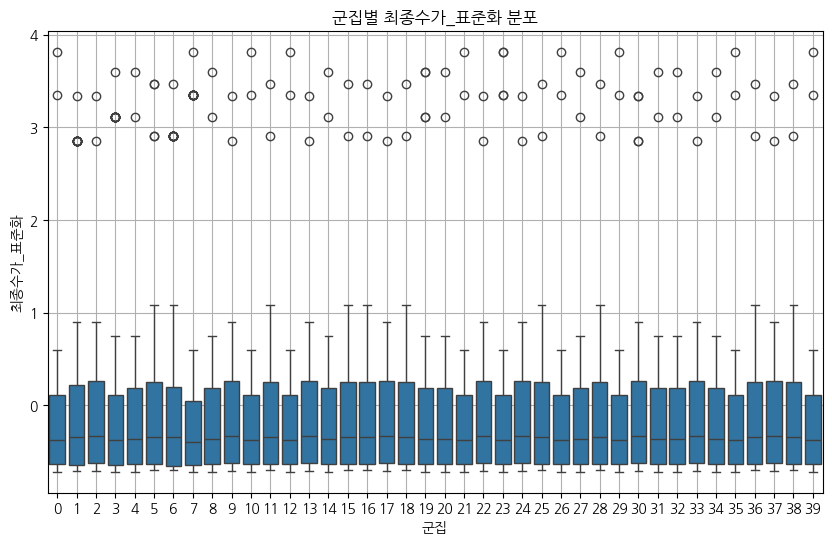

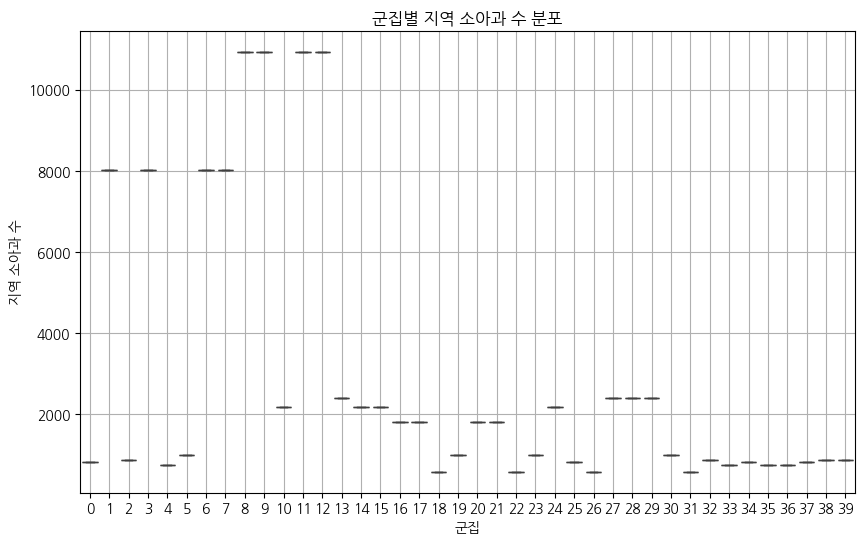

In [35]:
# k-mean 군집화 분석 

Kcluster_counts = NABIS['K-MEAN 군집'].value_counts()
print("\n군집별 데이터 수:\n", Kcluster_counts)

Kcluster_means = NABIS.groupby('K-MEAN 군집').mean()
print("\n군집별 평균값:\n", Kcluster_means)

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='최종수가_표준화', data=NABIS)
plt.title('군집별 최종수가_표준화 분포')
plt.xlabel('군집')
plt.ylabel('최종수가_표준화')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='지역 소아과 수', data=NABIS)
plt.title('군집별 지역 소아과 수 분포')
plt.xlabel('군집')
plt.ylabel('지역 소아과 수')
plt.grid(True)
plt.show()

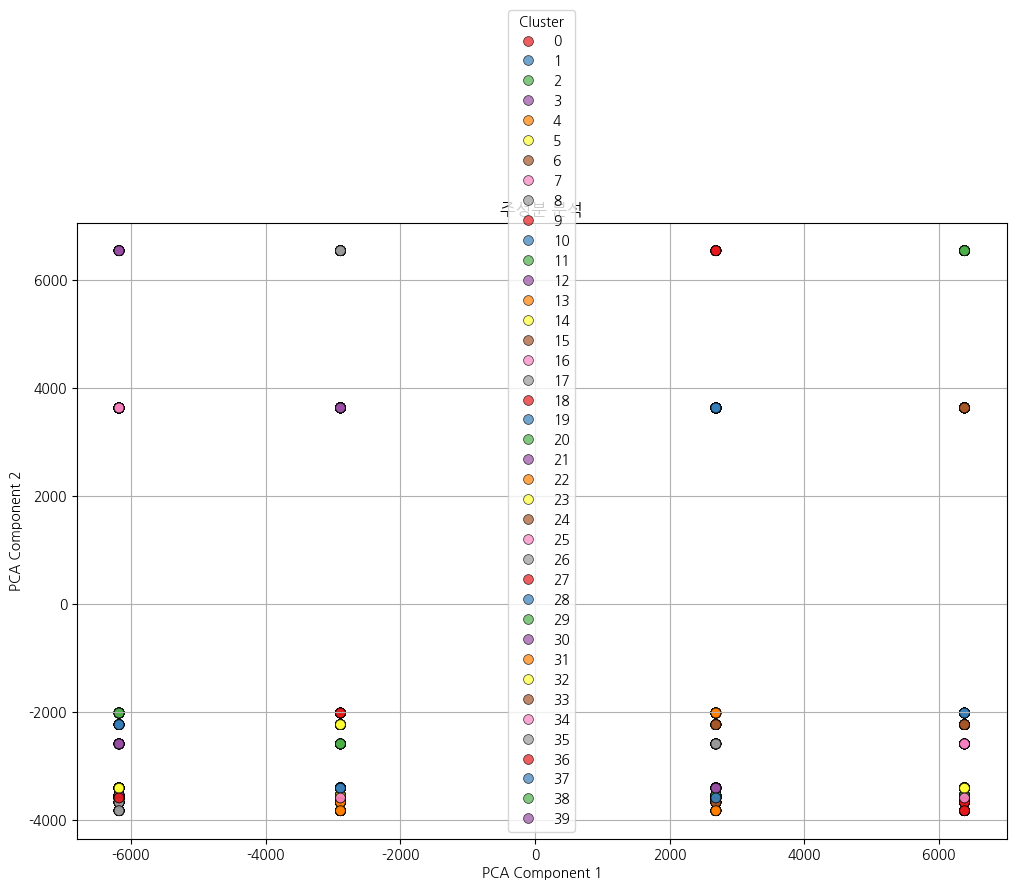

In [36]:
# PCA
from sklearn.decomposition import PCA
NABIS1 = NABIS.copy()

# 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

NABIS1['PCA1'] = pca_result[:, 0]
NABIS1['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='K-MEAN 군집', palette='Set1', data=NABIS1, s=50, alpha=0.7, edgecolor='k')
plt.title('주성분 분석')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [37]:
NABIS.columns

Index(['Unnamed: 0', '연도', '의료수가', '가중치', '지역 소아과 수', '최종수가', '강원특별자치도_건강보험',
       '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수', '강원특별자치도_천명당 소아과 수',
       ...
       '전북특별자치도_소아과 의료인력 수_표준화', '전라남도_소아과 병원 수_표준화', '전라남도_소아과 의료인력 수_표준화',
       '경상북도_소아과 병원 수_표준화', '경상북도_소아과 의료인력 수_표준화', '경상남도_소아과 병원 수_표준화',
       '경상남도_소아과 의료인력 수_표준화', '제주특별자치도_소아과 병원 수_표준화', '제주특별자치도_소아과 의료인력 수_표준화',
       'K-MEAN 군집'],
      dtype='object', length=122)

[0]	validation_0-rmse:0.00273	validation_1-rmse:0.00270
[1]	validation_0-rmse:0.00271	validation_1-rmse:0.00267
[2]	validation_0-rmse:0.00268	validation_1-rmse:0.00265
[3]	validation_0-rmse:0.00265	validation_1-rmse:0.00262
[4]	validation_0-rmse:0.00263	validation_1-rmse:0.00259
[5]	validation_0-rmse:0.00260	validation_1-rmse:0.00257
[6]	validation_0-rmse:0.00257	validation_1-rmse:0.00254
[7]	validation_0-rmse:0.00255	validation_1-rmse:0.00252
[8]	validation_0-rmse:0.00252	validation_1-rmse:0.00249
[9]	validation_0-rmse:0.00250	validation_1-rmse:0.00247
[10]	validation_0-rmse:0.00247	validation_1-rmse:0.00244
[11]	validation_0-rmse:0.00245	validation_1-rmse:0.00242
[12]	validation_0-rmse:0.00242	validation_1-rmse:0.00239
[13]	validation_0-rmse:0.00240	validation_1-rmse:0.00237
[14]	validation_0-rmse:0.00238	validation_1-rmse:0.00235
[15]	validation_0-rmse:0.00235	validation_1-rmse:0.00232
[16]	validation_0-rmse:0.00233	validation_1-rmse:0.00230
[17]	validation_0-rmse:0.00231	validation

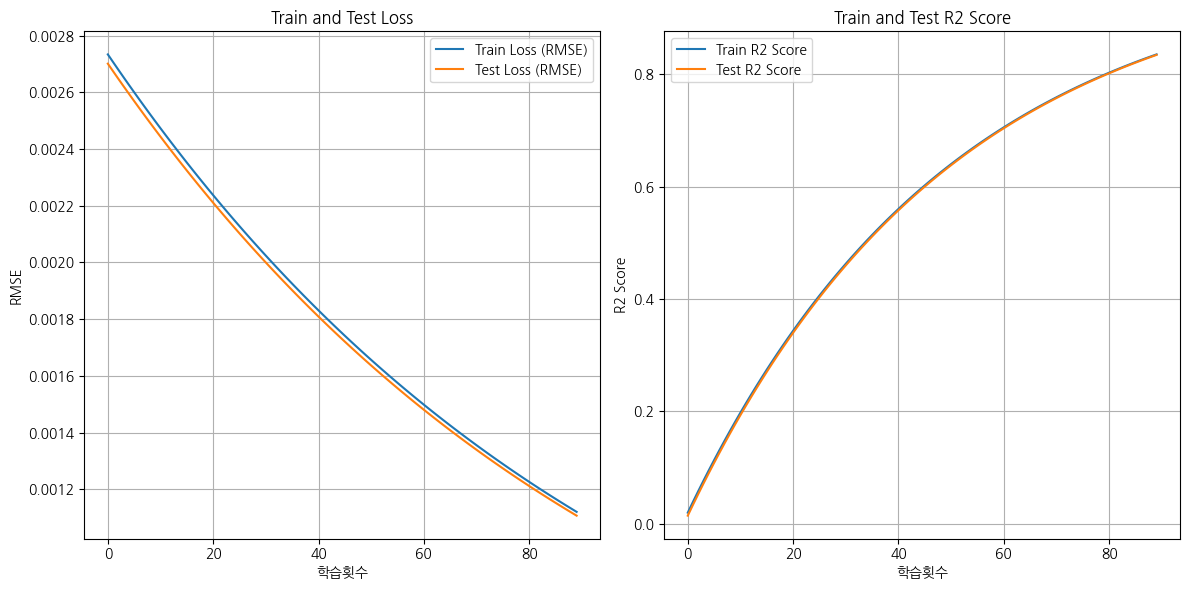


최종 Mean Squared Error: 0.00
최종 R2 Score: 0.83


['./xgboost_gangwon_model.pkl']

In [38]:
X = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', 'K-MEAN 군집', '강원특별자치도_건강보험', '의료수가_표준화', "강원특별자치도_소아과 병원 수"]]
y = NABIS['강원특별자치도_천명당 소아과 수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=90, learning_rate=0.01, max_depth=7, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

evals_result = xgb_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

train_r2_scores = []
test_r2_scores = []

for i in range(len(train_loss)):
    y_train_pred = xgb_model.predict(X_train, iteration_range=(0, i + 1))
    y_test_pred = xgb_model.predict(X_test, iteration_range=(0, i + 1))
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss (RMSE)')
plt.plot(test_loss, label='Test Loss (RMSE)')
plt.xlabel('학습횟수')
plt.ylabel('RMSE')
plt.title('Train and Test Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_r2_scores, label='Train R2 Score')
plt.plot(test_r2_scores, label='Test R2 Score')
plt.xlabel('학습횟수')
plt.ylabel('R2 Score')
plt.title('Train and Test R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n최종 Mean Squared Error: {mse:.2f}")
print(f"최종 R2 Score: {r2:.2f}")

# 모델 저장 
joblib.dump(xgb_model, './xgboost_gangwon_model.pkl')

In [39]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2: {r2}')

MSE: 1.225463178353872e-06, R2: 0.8344606560082122


In [40]:
xgb_model = joblib.load('./xgboost_gangwon_model.pkl')

scaler = StandardScaler()
scaler.fit(X_train)  

input_data = {
    '진료과목_인코딩': [3],  
    '지역_인코딩': [0],         # 고정값
    '의료기관_인코딩': [1], 
    '최종수가_표준화': [12000000],  
    'K-MEAN 군집': [9], 
    '강원특별자치도_건강보험': [1.577019],
    '의료수가_표준화': [-0.471806],
    "강원특별자치도_소아과 병원 수" :[700]
}
input_df = pd.DataFrame(input_data)

input_scaled = scaler.transform(input_df)

prediction_1 = xgb_model.predict(input_scaled)
print(f'예측 결과: {prediction_1[0]} (표준화된 소아과 병원 수)')

예측 결과: 0.14356431365013123 (표준화된 소아과 병원 수)
